In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [2]:
product = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')
products_train = pd.read_csv('order_products__train.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
aisles = pd.read_csv('aisles.csv')

In [4]:
df = pd.merge(products_train, product, on='product_id')

In [5]:
df.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01,7.130423e+01,9.839777e+00
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01,3.810409e+01,6.292830e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00,8.300000e+01,8.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00,1.070000e+02,1.600000e+01
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00,1.340000e+02,2.100000e+01


In [7]:
df_merge2 = pd.merge(df, orders, on = 'order_id')

In [11]:
df_merge3 = pd.merge(df_merge2, aisles, on ='aisle_id' )

In [13]:
df_merge4 = pd.merge(df_merge3, departments, on = 'department_id')

In [16]:
df_merge5 = pd.merge(df_merge4, order_products_prior, on = 'order_id')

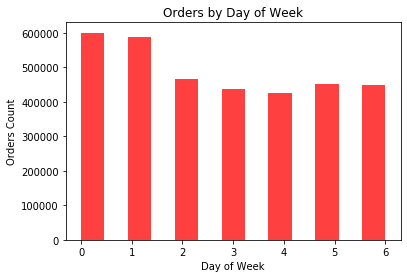

In [23]:
orders.order_dow.unique()
n, bins, patches = plt.hist(orders.order_dow, 13, facecolor="red", alpha=.75, align='mid')
plt.xlabel("Day of Week")
plt.ylabel("Orders Count")
plt.title("Orders by Day of Week")
plt.show()

In [26]:
product_by_reordered = pd.DataFrame({'mean_reorder': products_train.groupby(['product_id'])['reordered'].mean(),
                                    'count': products_train.groupby(['product_id'])['order_id'].count()})
product_by_reordered = product_by_reordered.reset_index()

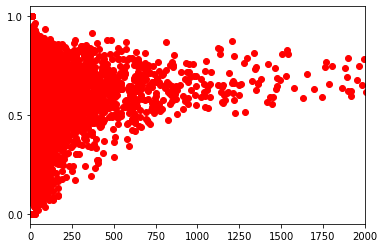

In [27]:
plt.xlim([0,2000])
plt.yticks([0,0.5,1.0,1.5])
plt.plot(product_by_reordered['count'],product_by_reordered['mean_reorder'] , 'ro')
plt.show()

In [33]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [34]:
goods = pd.merge(product, aisles, on = 'aisle_id')

In [36]:
goods.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes


In [38]:
goods_place = pd.merge(goods, departments, on = 'department_id')

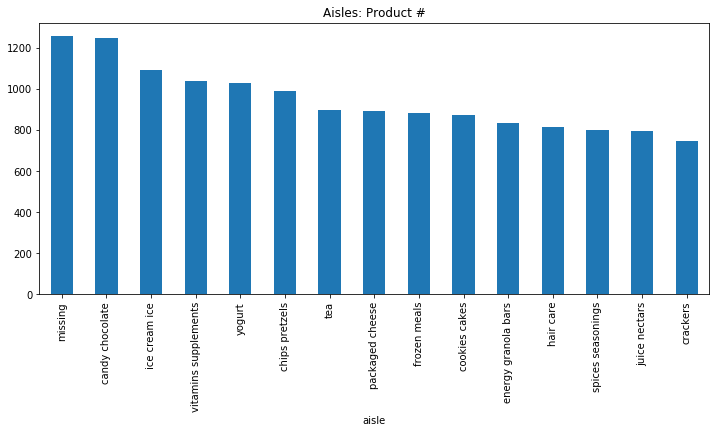

In [35]:
top_aisles_cnt = 15
plt.figure(figsize=(12, 5))
goods.groupby(['aisle']).count()['product_id']\
.sort_values(ascending=False)[:top_aisles_cnt].plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Aisles: Product #')

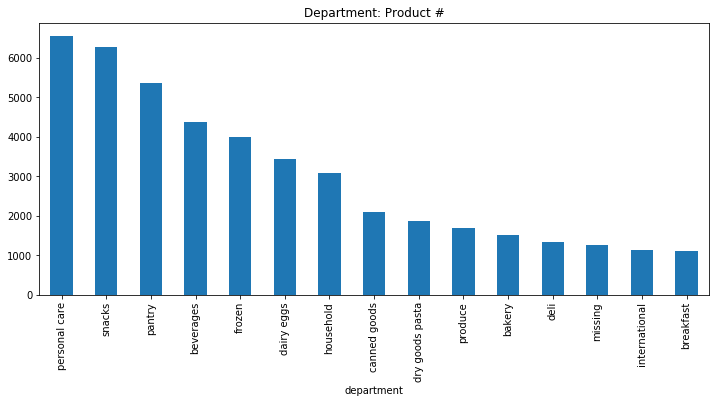

In [42]:
top_aisles = 15
plt.figure(figsize=(12,5))
goods_place.groupby(['department']).count()['product_id']\
.sort_values(ascending=False)[:top_aisles_cnt].plot(kind='bar',
                                                   #figsize=(12,5),
                                                   title='Department: Product #')

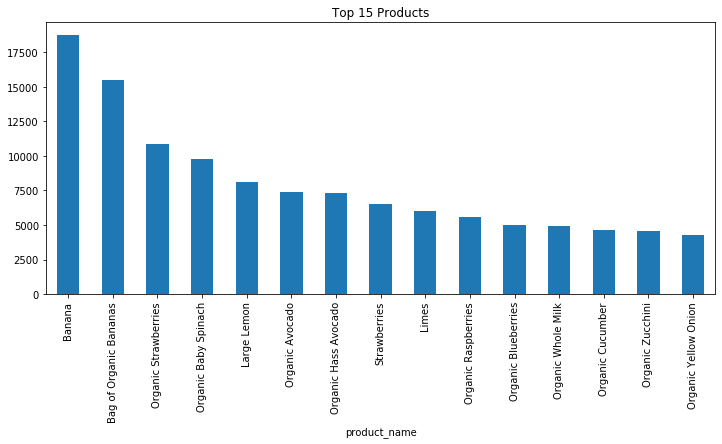

In [46]:
top_products = 15
plt.figure(figsize=(12,5))
df.groupby(['product_name']).count()['product_id']\
.sort_values(ascending=False)[:top_aisles_cnt].plot(kind='bar',
                                                   #figsize=(12,5),
                                                   title= 'Top 15 Products')

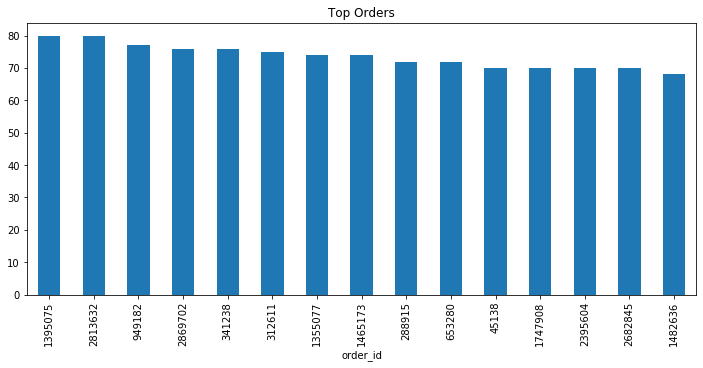

In [51]:
top_order = 15
plt.figure(figsize=(12,5))
products_train.groupby(['order_id']).count()['product_id']\
.sort_values(ascending=False)[:top_aisles_cnt].plot(kind='bar',
                                                   #figsize=(12,5)
                                                   title= 'Top Orders')

In [47]:
products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [48]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
top_customer = 